<a href="https://colab.research.google.com/github/Shakilmahabub/Shakilmahabub/blob/main/DMM_data_for_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [114]:
df = pd.read_excel('/content/DMM Experimental data for ML.xlsx')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [115]:
df.head()

Cement contents  Curing  ...  Avg_Failure_Strain  Cement_Brand
0              140      28  ...            0.900000   BASHUNDHARA
1              140      28  ...            1.633333   BASHUNDHARA
2              140      28  ...            1.066667   BASHUNDHARA
3              140      28  ...            1.200000          SHAH
4              140      28  ...            0.733333   BASHUNDHARA

[5 rows x 21 columns]

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cement contents        846 non-null    int64  
 1   Curing                 846 non-null    int64  
 2   Water_Cement Ratio     846 non-null    float64
 3   Top_Elevation          846 non-null    float64
 4   Middle_Elevation       846 non-null    float64
 5   Bottom_Elevation       846 non-null    float64
 6   TCR %                  846 non-null    float64
 7   RQD %                  846 non-null    float64
 8   UCS_Top                846 non-null    float64
 9   UCS_Middle             846 non-null    float64
 10  UCS_Bottom             846 non-null    float64
 11  Avg_UCS                846 non-null    float64
 12  Top_Density            846 non-null    float64
 13  Middle_Density         846 non-null    float64
 14  Bottom_Density         846 non-null    float64
 15  Avg_De

In [117]:
df.index

RangeIndex(start=0, stop=846, step=1)

In [118]:
df.shape

(846, 21)

In [119]:
df.count()

Cement contents          846
Curing                   846
Water_Cement Ratio       846
Top_Elevation            846
Middle_Elevation         846
Bottom_Elevation         846
TCR %                    846
RQD %                    846
UCS_Top                  846
UCS_Middle               846
UCS_Bottom               846
Avg_UCS                  846
Top_Density              846
Middle_Density           846
Bottom_Density           846
Avg_Density              846
Top_Failure_Strain       846
Middle_Failure_Strain    846
Bottom_Failure_Strain    846
Avg_Failure_Strain       846
Cement_Brand             846
dtype: int64

In [120]:
df.isnull().values.any()

False

In [121]:
df.isnull().values.sum()

0

In [122]:
#Showing the null values as per attributes
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [123]:
print(df[df.isnull().any(axis=1)][null_columns].head(20))

Empty DataFrame
Columns: []
Index: []


In [124]:
df.columns

Index(['Cement contents', 'Curing', 'Water_Cement Ratio', 'Top_Elevation',
       'Middle_Elevation', 'Bottom_Elevation', 'TCR %', 'RQD %', 'UCS_Top',
       'UCS_Middle', 'UCS_Bottom', 'Avg_UCS', 'Top_Density', 'Middle_Density',
       'Bottom_Density', 'Avg_Density', 'Top_Failure_Strain',
       'Middle_Failure_Strain', 'Bottom_Failure_Strain', 'Avg_Failure_Strain',
       'Cement_Brand'],
      dtype='object')

In [125]:
# Filling null values with specific value
df['Cement contents'].fillna(df['Cement contents'].mode()[0], inplace=True)
df['Curing'].fillna(df['Curing'].mode()[0], inplace=True)
df['Water_Cement Ratio'].fillna(df['Water_Cement Ratio'].mode()[0], inplace=True)
df['Top_Elevation'].fillna(df['Top_Elevation'].mode()[0], inplace=True)
df['Middle_Elevation'].fillna(df['Middle_Elevation'].mode()[0], inplace=True)
df['Bottom_Elevation'].fillna(df['Bottom_Elevation'].mode()[0], inplace=True)
df['Top_Density'].fillna(df['Top_Density'].mode()[0], inplace=True)
df['Middle_Density'].fillna(df['Middle_Density'].mode()[0], inplace=True)
df['Bottom_Density'].fillna(df['Bottom_Density'].mode()[0], inplace=True)
df['Avg_Density'].fillna(df['Avg_Density'].mode()[0], inplace=True)
df['TCR %'].fillna(df['TCR %'].mode()[0], inplace=True)
df['RQD %'].fillna(df['RQD %'].mode()[0], inplace=True)
df['UCS_Top'].fillna(df['UCS_Top'].mode()[0], inplace=True)
df['UCS_Middle'].fillna(df['UCS_Middle'].mode()[0], inplace=True)
df['UCS_Bottom'].fillna(df['UCS_Bottom'].mode()[0], inplace=True)
df['Avg_UCS'].fillna(df['Avg_UCS'].mode()[0], inplace=True)
df['Top_Failure_Strain'].fillna(df['Top_Failure_Strain'].mode()[0], inplace=True)
df['Middle_Failure_Strain'].fillna(df['Middle_Failure_Strain'].mode()[0], inplace=True)
df['Bottom_Failure_Strain'].fillna(df['Bottom_Failure_Strain'].mode()[0], inplace=True)
df['Avg_Failure_Strain'].fillna(df['Avg_Failure_Strain'].mode()[0], inplace=True)
df['Cement_Brand'].fillna(df['Cement_Brand'].mode()[0], inplace=True)
df.head()

Cement contents  Curing  ...  Avg_Failure_Strain  Cement_Brand
0              140      28  ...            0.900000   BASHUNDHARA
1              140      28  ...            1.633333   BASHUNDHARA
2              140      28  ...            1.066667   BASHUNDHARA
3              140      28  ...            1.200000          SHAH
4              140      28  ...            0.733333   BASHUNDHARA

[5 rows x 21 columns]

In [126]:
df.describe()

Cement contents  Curing  ...  Bottom_Failure_Strain  Avg_Failure_Strain
count       846.000000   846.0  ...             846.000000          846.000000
mean        200.531915    28.0  ...               0.827423            0.843783
std          39.614423     0.0  ...               0.304452            0.216323
min         140.000000    28.0  ...               0.100000            0.233333
25%         180.000000    28.0  ...               0.600000            0.700000
50%         200.000000    28.0  ...               0.700000            0.800000
75%         220.000000    28.0  ...               1.000000            0.933333
max         320.000000    28.0  ...               3.000000            2.100000

[8 rows x 20 columns]

In [127]:
#use of mapping function
mapping = {'BASHUNDHARA' :1 , 'SHAH' : 2 }
df['Cement_Brand'] = df['Cement_Brand'].map(mapping)
df

Cement contents  Curing  ...  Avg_Failure_Strain  Cement_Brand
0                140      28  ...            0.900000           1.0
1                140      28  ...            1.633333           1.0
2                140      28  ...            1.066667           1.0
3                140      28  ...            1.200000           2.0
4                140      28  ...            0.733333           1.0
..               ...     ...  ...                 ...           ...
841              320      28  ...            0.966667           1.0
842              320      28  ...            0.533333           2.0
843              320      28  ...            0.566667           1.0
844              320      28  ...            0.766667           1.0
845              320      28  ...            0.900000           1.0

[846 rows x 21 columns]

In [128]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
df.head()

Cement contents  Curing  ...  Avg_Failure_Strain  Cement_Brand
0              140      28  ...            0.900000           1.0
1              140      28  ...            1.633333           1.0
2              140      28  ...            1.066667           1.0
3              140      28  ...            1.200000           2.0
4              140      28  ...            0.733333           1.0

[5 rows x 21 columns]

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled = pd.DataFrame(scaler.transform(df),columns=df.columns)
scaled

Cement contents  Curing  ...  Avg_Failure_Strain  Cement_Brand
0                0.0     0.0  ...            0.357143           0.0
1                0.0     0.0  ...            0.750000           0.0
2                0.0     0.0  ...            0.446429           0.0
3                0.0     0.0  ...            0.517857           1.0
4                0.0     0.0  ...            0.267857           0.0
..               ...     ...  ...                 ...           ...
841              1.0     0.0  ...            0.392857           0.0
842              1.0     0.0  ...            0.160714           1.0
843              1.0     0.0  ...            0.178571           0.0
844              1.0     0.0  ...            0.285714           0.0
845              1.0     0.0  ...            0.357143           0.0

[846 rows x 21 columns]

In [84]:
df.cov()

Cement contents  ...  Cement_Brand
Cement contents            1569.302531  ...      2.695260
Curing                        0.000000  ...      0.000000
Water_Cement Ratio           -1.189928  ...      0.001958
Top_Elevation                 1.782962  ...      0.022926
Middle_Elevation              6.508241  ...     -0.036217
Bottom_Elevation             11.088267  ...     -0.180605
TCR %                         6.538435  ...     -0.178324
RQD %                        19.859029  ...     -0.005116
UCS_Top                   13213.470213  ...     10.618195
UCS_Middle                10646.739382  ...     27.943505
UCS_Bottom                 9405.018731  ...     18.250364
Avg_UCS                   10785.433971  ...     19.456635
Top_Density                  -5.449688  ...     -0.006917
Middle_Density               -4.990833  ...     -0.028467
Bottom_Density               -3.625432  ...     -0.056263
Avg_Density                  -4.824779  ...     -0.031676
Top_Failure_Strain           -1.415951  ...      0.003310
Middle_Failure_Strain        -1.123502  ...      0.010068
Bottom_Failure_Strain        -1.551882  ...      0.012022
Avg_Failure_Strain           -1.368010  ...      0.008473
Cement_Brand                  2.695260  ...      0.237656

[21 rows x 21 columns]

In [85]:
df.corr()

Cement contents  ...  Cement_Brand
Cement contents               1.000000  ...      0.121190
Curing                             NaN  ...           NaN
Water_Cement Ratio           -0.512970  ...      0.055481
Top_Elevation                 0.057037  ...      0.058645
Middle_Elevation              0.106785  ...     -0.046484
Bottom_Elevation              0.110273  ...     -0.133932
TCR %                         0.079452  ...     -0.189278
RQD %                         0.088584  ...     -0.001698
UCS_Top                       0.378754  ...      0.023718
UCS_Middle                    0.329631  ...      0.069695
UCS_Bottom                    0.300820  ...      0.046609
Avg_UCS                       0.424237  ...      0.062298
Top_Density                  -0.210946  ...     -0.021192
Middle_Density               -0.197217  ...     -0.089788
Bottom_Density               -0.127544  ...     -0.153228
Avg_Density                  -0.237175  ...     -0.123161
Top_Failure_Strain           -0.119777  ...      0.022134
Middle_Failure_Strain        -0.079782  ...      0.057142
Bottom_Failure_Strain        -0.128673  ...      0.075063
Avg_Failure_Strain           -0.159637  ...      0.076890
Cement_Brand                  0.121190  ...      1.000000

[21 rows x 21 columns]

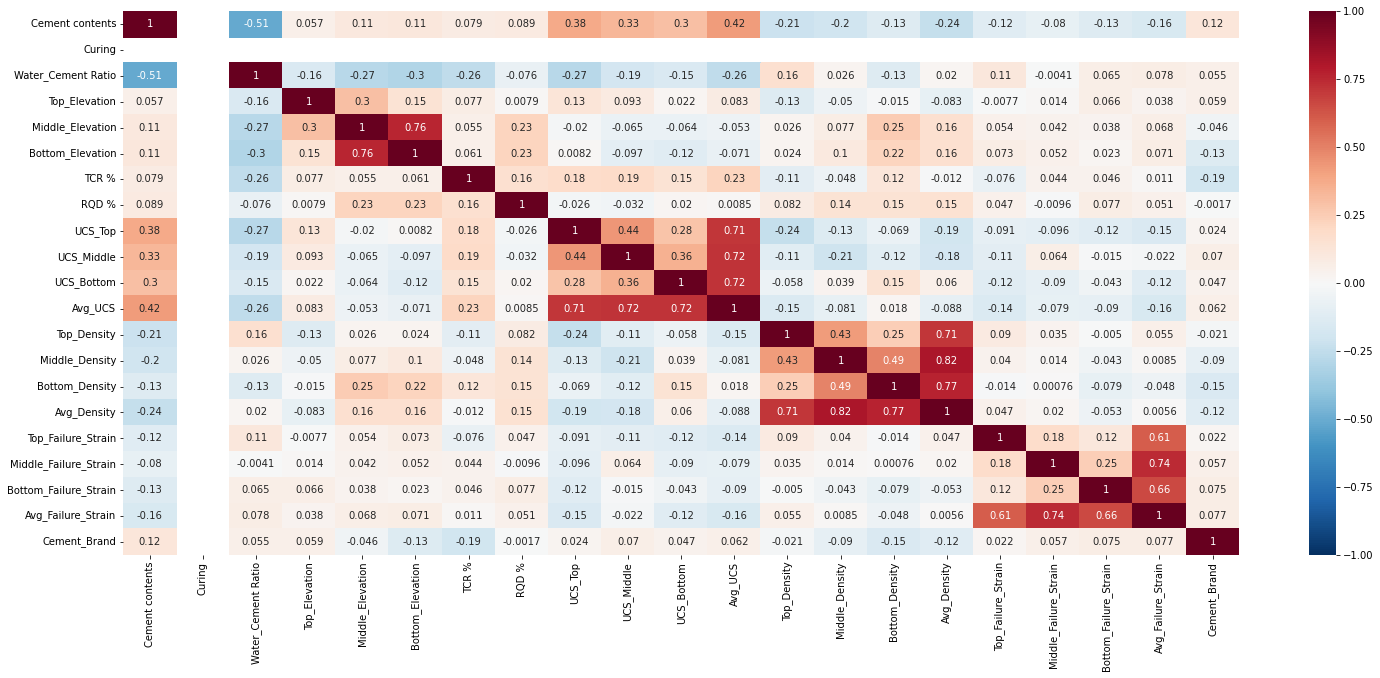

In [86]:
correlation = df.corr()
plt.figure(figsize=(25, 10))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

In [129]:
df.columns

Index(['Cement contents', 'Curing', 'Water_Cement Ratio', 'Top_Elevation',
       'Middle_Elevation', 'Bottom_Elevation', 'TCR %', 'RQD %', 'UCS_Top',
       'UCS_Middle', 'UCS_Bottom', 'Avg_UCS', 'Top_Density', 'Middle_Density',
       'Bottom_Density', 'Avg_Density', 'Top_Failure_Strain',
       'Middle_Failure_Strain', 'Bottom_Failure_Strain', 'Avg_Failure_Strain',
       'Cement_Brand'],
      dtype='object')

In [88]:
Strength=df.groupby('Cement contents')['Avg_UCS'].mean()
Strength

Cement contents
140    1456.108602
150    1409.458140
160    1488.942857
180    1655.461765
200    1605.959669
220    1916.669091
240    2301.305833
250    2268.126667
260    1449.722778
270    2373.000000
320    2399.830159
Name: Avg_UCS, dtype: float64

In [89]:
Strength=df.groupby('Water_Cement Ratio')['Avg_UCS'].mean()
Strength

Water_Cement Ratio
0.8    2258.862917
1.0    1693.857097
Name: Avg_UCS, dtype: float64

In [90]:
Strength=df.groupby('Water_Cement Ratio')['Avg_Density'].mean()
Strength

Water_Cement Ratio
0.8    17.978333
1.0    18.014218
Name: Avg_Density, dtype: float64

In [91]:
Strength=df.groupby('Avg_UCS')['Avg_Density'].mean()
Strength

Avg_UCS
428.266667     18.150000
515.766667     18.556667
521.733333     18.096667
575.200000     18.200000
602.666667     18.783333
                 ...    
3265.366667    17.643333
3271.733333    18.513333
3280.666667    18.473333
3281.566667    17.976667
3287.066667    17.953333
Name: Avg_Density, Length: 839, dtype: float64

In [27]:
Strength=df.groupby('Avg_Failure_Strain')['Avg_UCS'].mean()
Strength

Avg_Failure_Strain
0.233333    3226.400000
0.433333    1832.166667
0.466667    2154.070833
0.500000    1522.851852
0.530000    2068.916667
               ...     
1.600000     853.800000
1.600000    2851.366667
1.633333    1592.666667
1.700000    1131.466667
2.100000    1198.066667
Name: Avg_UCS, Length: 70, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


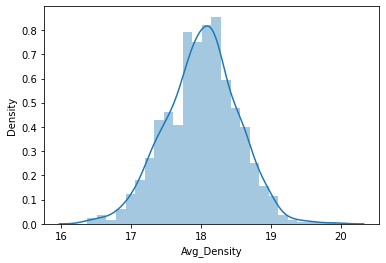

In [92]:
sns.distplot(Strength)

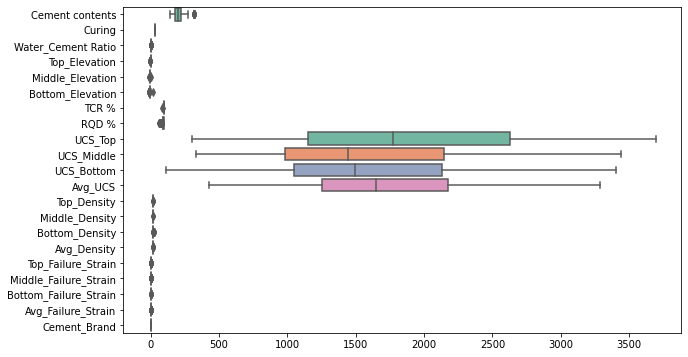

In [94]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

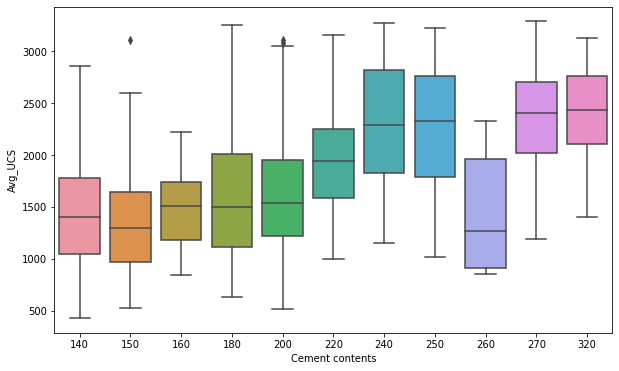

In [95]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Cement contents', y='Avg_UCS', data=df)

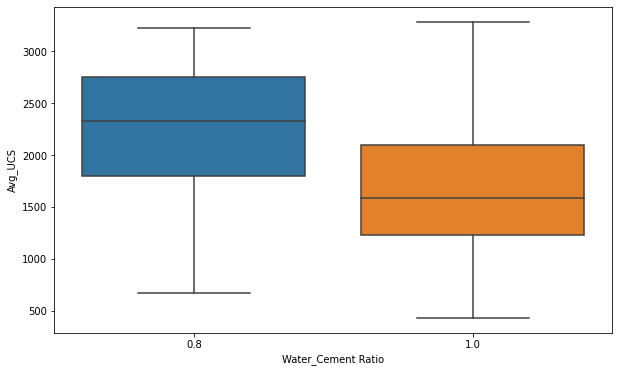

In [97]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Water_Cement Ratio', y='Avg_UCS', data=df)

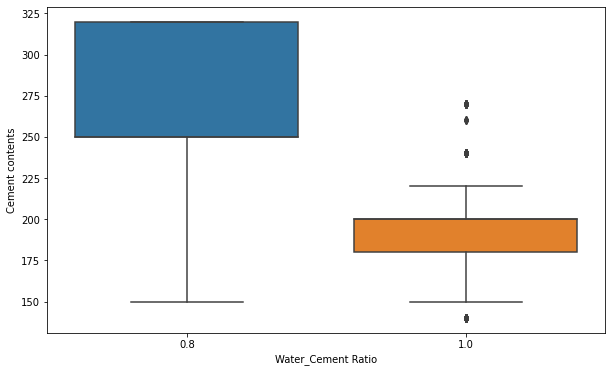

In [96]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Water_Cement Ratio', y='Cement contents', data=df)

<Figure size 1800x1440 with 0 Axes>

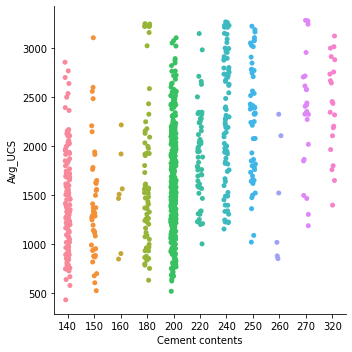

In [98]:
plt.figure(figsize=(25, 20))
ax=sns.catplot(x='Cement contents', y='Avg_UCS', data=df);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe6c35e050>,
      dtype=object)

<Figure size 1152x720 with 0 Axes>

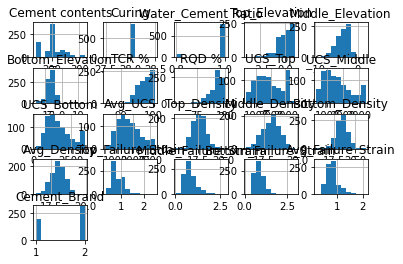

In [99]:
plt.figure(figsize=(16, 10))
df.hist()

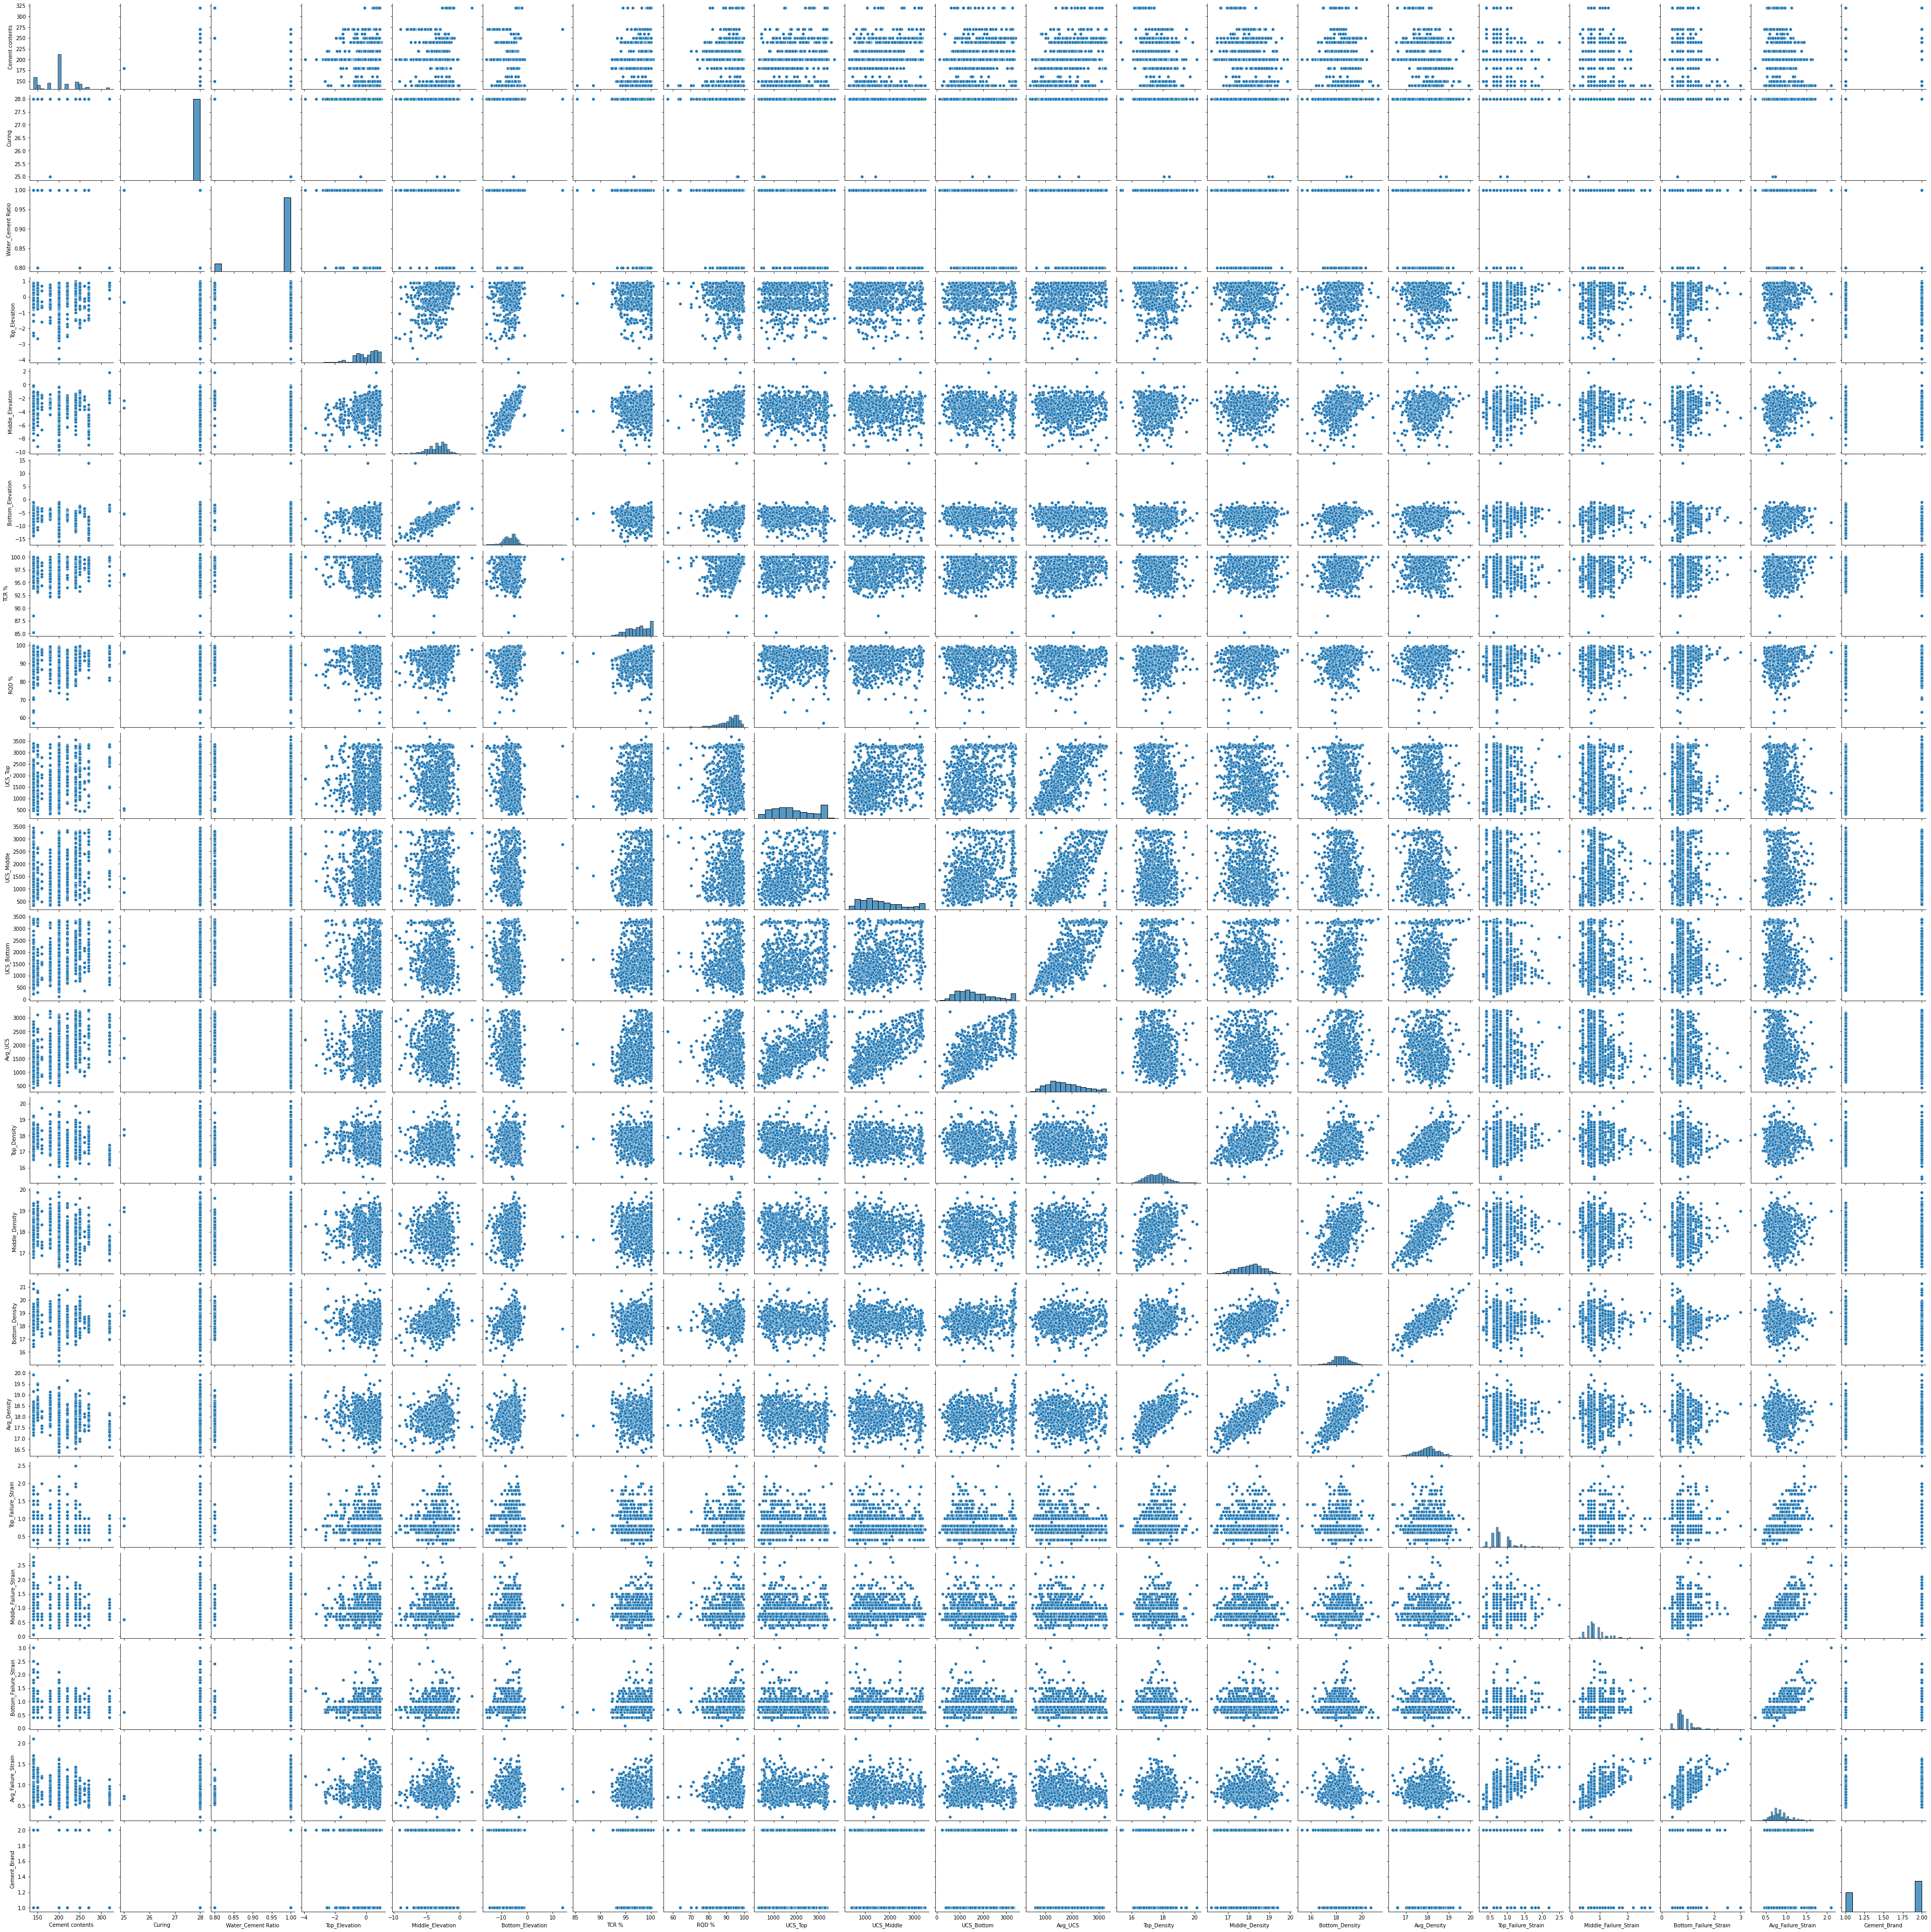

In [50]:
sns.pairplot(df);

In [35]:
df.columns

Index(['Cement contents', 'Curing', 'Water_Cement Ratio', 'Top_Elevation',
       'Middle_Elevation', 'Bottom_Elevation', 'TCR %', 'RQD %', 'UCS_Top',
       'UCS_Middle', 'UCS_Bottom', 'Avg_UCS', 'Top_Density', 'Middle_Density',
       'Bottom_Density', 'Avg_Density', 'Top_Failure_Strain',
       'Middle_Failure_Strain', 'Bottom_Failure_Strain', 'Avg_Failure_Strain',
       'Cement_Brand'],
      dtype='object')

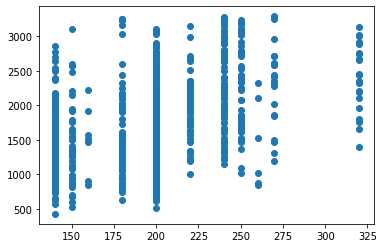

In [100]:
plt.scatter(x='Cement contents', y='Avg_UCS', data=df)

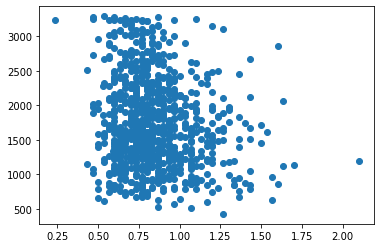

In [101]:
plt.scatter(x='Avg_Failure_Strain', y='Avg_UCS', data=df)

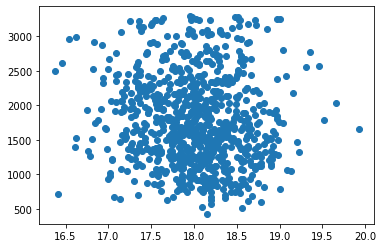

In [103]:
plt.scatter(x='Avg_Density', y='Avg_UCS', data=df)

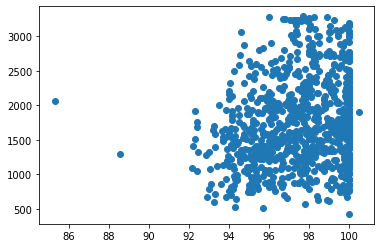

In [104]:
plt.scatter(x='TCR %', y='Avg_UCS', data=df)

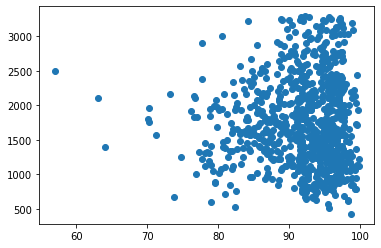

In [105]:
plt.scatter(x='RQD %', y='Avg_UCS', data=df)

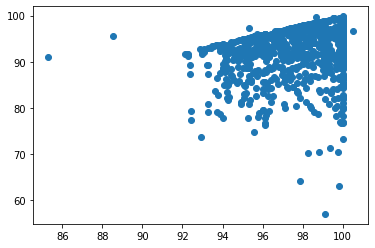

In [106]:
plt.scatter(x='TCR %', y='RQD %', data=df)

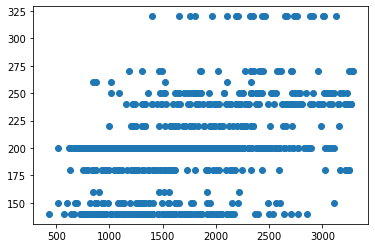

In [107]:
plt.scatter(x='Avg_UCS', y='Cement contents', data=df)

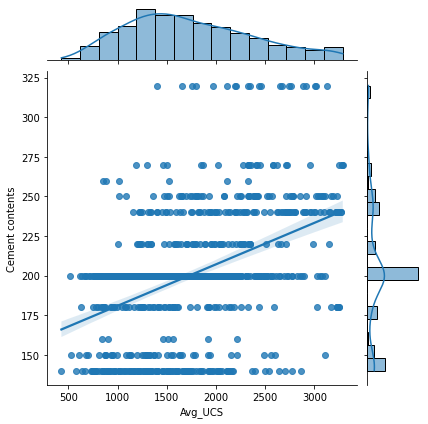

In [108]:
sns.jointplot(x='Avg_UCS', y='Cement contents', data=df,kind="reg")

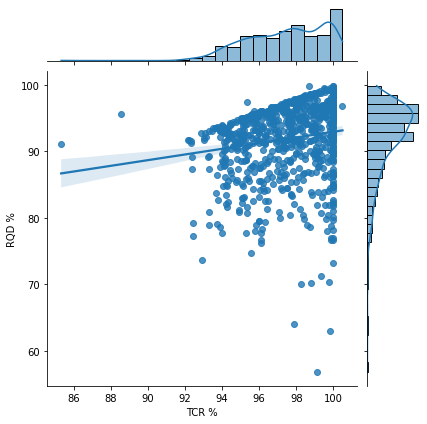

In [109]:
sns.jointplot(x='TCR %', y='RQD %', data=df, kind="reg");

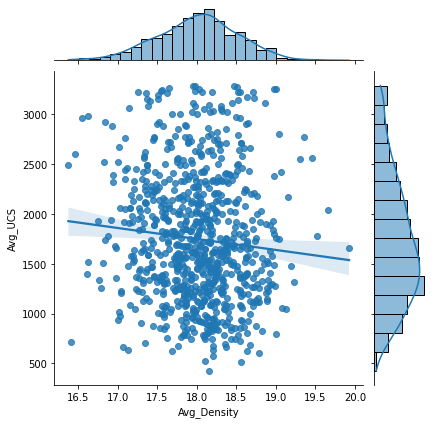

In [110]:
sns.jointplot(x='Avg_Density', y='Avg_UCS', data=df, kind="reg");

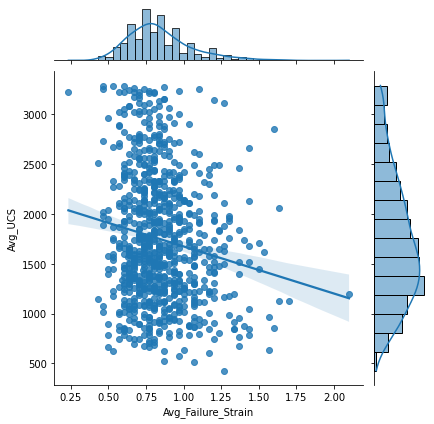

In [112]:
sns.jointplot(x='Avg_Failure_Strain', y='Avg_UCS', data=df, kind="reg");

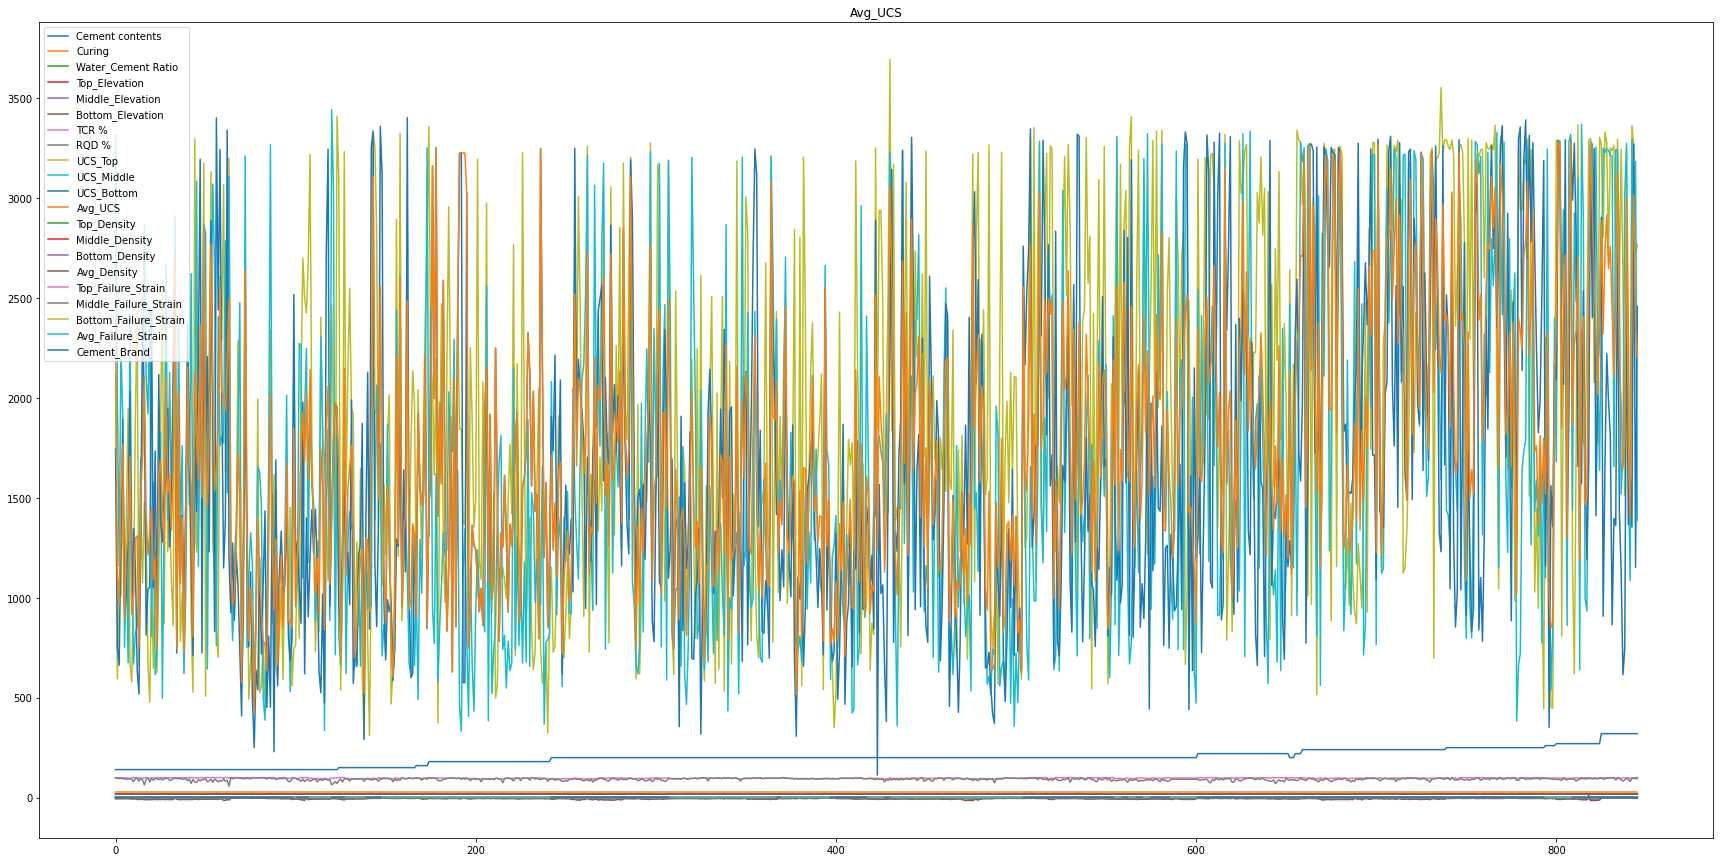

In [111]:
import matplotlib.pyplot as plt

df.plot(figsize=(30,15))
plt.title('Avg_UCS')
plt.show()